# US Bureau of Transport Flight Data Analysis

In [1]:
#importing libraries

import pandas as pd #for data manipulation
import numpy as np #for scientific computing

print("Setup Complete")

Setup Complete


In [2]:
#Loading the datasets

dtf_jan=pd.read_csv("../Downloads/Bureau_Transport_2019/Bureau_Transport_Jan2019.csv")
dtf_feb=pd.read_csv("../Downloads/Bureau_Transport_2019/Bureau_Transport_Feb2019.csv")
dtf_mar=pd.read_csv("../Downloads/Bureau_Transport_2019/Bureau_Transport_Mar2019.csv")
dtf_apr=pd.read_csv("../Downloads/Bureau_Transport_2019/Bureau_Transport_Apr2019.csv")
dtf_may=pd.read_csv("../Downloads/Bureau_Transport_2019/Bureau_Transport_May2019.csv")
dtf_jun=pd.read_csv("../Downloads/Bureau_Transport_2019/Bureau_Transport_Jun2019.csv")

print("Done loading all datasets")

Done loading all datasets


In [3]:
#Merging datasets

dtf_qtr1=pd.concat([dtf_jan,dtf_feb,dtf_mar])
dtf_qtr2=pd.concat([dtf_apr,dtf_may,dtf_jun])
dtf_half2019=pd.concat([dtf_jan,dtf_feb,dtf_mar,dtf_apr,dtf_may,dtf_jun])

print("Done merging datasets!!")

Done merging datasets!!


In [4]:
dtf_qtr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749234 entries, 0 to 632073
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   MONTH                  int64  
 2   DAY_OF_WEEK            int64  
 3   OP_UNIQUE_CARRIER      object 
 4   TAIL_NUM               object 
 5   ORIGIN_AIRPORT_ID      int64  
 6   ORIGIN_AIRPORT_SEQ_ID  int64  
 7   ORIGIN_CITY_MARKET_ID  int64  
 8   ORIGIN                 object 
 9   ORIGIN_CITY_NAME       object 
 10  ORIGIN_STATE_NM        object 
 11  DEST_AIRPORT_ID        int64  
 12  DEST_AIRPORT_SEQ_ID    int64  
 13  DEST_CITY_MARKET_ID    int64  
 14  DEST                   object 
 15  DEST_CITY_NAME         object 
 16  DEST_STATE_NM          object 
 17  CRS_DEP_TIME           int64  
 18  DEP_TIME               float64
 19  DEP_DELAY              float64
 20  TAXI_OUT               float64
 21  WHEELS_OFF             float64
 22  WHEELS_ON          

In [5]:
dtf_qtr1.head()

,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 39
0,2019,1,5,WN,N220WN,13204,1320402,31454,MCO,"Orlando, FL",...,1.0,834.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,5,WN,N7889A,13204,1320402,31454,MCO,"Orlando, FL",...,1.0,834.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,5,WN,N764SW,13204,1320402,31454,MCO,"Orlando, FL",...,1.0,1072.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,5,WN,N8309C,13204,1320402,31454,MCO,"Orlando, FL",...,1.0,1072.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,5,WN,N8686A,13204,1320402,31454,MCO,"Orlando, FL",...,1.0,1072.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [6]:
#Airline with most flights in 1st Quater of 2019

flight_freq= dtf_qtr1[['OP_UNIQUE_CARRIER','FLIGHTS']].groupby(['OP_UNIQUE_CARRIER'], as_index=False).sum().sort_values(by='FLIGHTS', ascending=False)
flight_freq

,OP_UNIQUE_CARRIER,FLIGHTS
14,WN,330225.0
1,AA,228103.0
4,DL,225381.0
12,OO,194934.0
13,UA,144288.0
16,YX,76818.0
9,MQ,75751.0
3,B6,72768.0
11,OH,69080.0
2,AS,61466.0


Airline WN has the maximum number of 330,225 flights

In [7]:
#Missing values

dtf_half2019.isnull().sum()

YEAR                           0
MONTH                          0
DAY_OF_WEEK                    0
OP_UNIQUE_CARRIER              0
TAIL_NUM                   12641
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN_CITY_MARKET_ID          0
ORIGIN                         0
ORIGIN_CITY_NAME               0
ORIGIN_STATE_NM                0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST_CITY_MARKET_ID            0
DEST                           0
DEST_CITY_NAME                 0
DEST_STATE_NM                  0
CRS_DEP_TIME                   0
DEP_TIME                   82762
DEP_DELAY                  82782
TAXI_OUT                   84726
WHEELS_OFF                 84726
WHEELS_ON                  86910
TAXI_IN                    86910
CRS_ARR_TIME                   0
ARR_TIME                   86910
ARR_DELAY                  95310
CANCELLED                      0
DIVERTED                       0
AIR_TIME                   95310
FLIGHTS   

In [8]:
#Total Number of Airline travels in 1st half of 2019

dtf_half2019['FLIGHTS'].sum()

3634338.0

There were a total of 3,634,338 flights in the 1st half of 2019

In [9]:
#Total AirTime in May 2019

tot_airtime = dtf_may['AIR_TIME'].sum()
tot_airtime_hrs = tot_airtime/60
tot_airtime_hrs

1154951.7333333334

There was a total airtime of 1,154,951.7 hours in May 2019

In [10]:
# Busiest City in Apr 2019

dtf_apr[['ORIGIN_CITY_NAME','FLIGHTS']].groupby(['ORIGIN_CITY_NAME']).sum().sort_values(by='FLIGHTS', ascending=False)

,FLIGHTS
ORIGIN_CITY_NAME,
"Chicago, IL",34396.0
"Atlanta, GA",32940.0
"New York, NY",25094.0
"Dallas/Fort Worth, TX",23933.0
"Houston, TX",19936.0
...,...
"Pago Pago, TT",9.0
"Branson, MO",8.0
"Adak Island, AK",8.0


In [11]:
dtf_apr[['DEST_CITY_NAME','FLIGHTS']].groupby(['DEST_CITY_NAME']).sum().sort_values(by='FLIGHTS', ascending=False)

,FLIGHTS
DEST_CITY_NAME,
"Chicago, IL",34393.0
"Atlanta, GA",32941.0
"New York, NY",25095.0
"Dallas/Fort Worth, TX",23930.0
"Houston, TX",19941.0
...,...
"Pago Pago, TT",9.0
"Branson, MO",8.0
"Adak Island, AK",8.0


Chicago, IL was considered the busiest city due to the number of flights 

In [12]:
#Airline that covered the most distance in June 2019

dtf_jun[['OP_UNIQUE_CARRIER','DISTANCE']].groupby(['OP_UNIQUE_CARRIER']).sum().sort_values(by='DISTANCE', ascending=False)

,DISTANCE
OP_UNIQUE_CARRIER,
WN,85246573.0
AA,80947454.0
DL,79641435.0
UA,65963246.0
OO,35631686.0
AS,30800766.0
B6,26972049.0
NK,17576612.0
YX,16804684.0


Carrier WN (Southwest Airlines) covered the most distance in June 2019

In [13]:
#Tail Number of Aircraft that covered the most distance in 2nd Quater of 2019

dtf_qtr2[['TAIL_NUM','DISTANCE']].groupby(['TAIL_NUM']).sum().sort_values(by='DISTANCE', ascending=False)

,DISTANCE
TAIL_NUM,
N934JB,598286.0
N943JT,592006.0
N984JB,588931.0
N982JB,585632.0
N979JT,583407.0
...,...
N861NW,528.0
N271AY,449.0
N270AY,449.0


Aircraft with tail number N934JB covered the most distance in 2nd Quarter of 2019

In [14]:
#State with maximum delays in 2nd Quarter of 2019

sum_delays=dtf_qtr2['CARRIER_DELAY'] + dtf_qtr2['LATE_AIRCRAFT_DELAY'] + dtf_qtr2['SECURITY_DELAY'] + dtf_qtr2['NAS_DELAY'] + dtf_qtr2['WEATHER_DELAY']
dtf_qtr2['Total_Delay'] = sum_delays #created a column merging all delays

dtf_qtr2[['ORIGIN_STATE_NM','Total_Delay']].groupby(['ORIGIN_STATE_NM']).sum().sort_values(by='Total_Delay', ascending=False)

,Total_Delay
ORIGIN_STATE_NM,
Texas,3619582.0
Florida,2510825.0
California,2232886.0
Illinois,2017533.0
New York,1815198.0
North Carolina,1384745.0
Georgia,1343227.0
Colorado,1199697.0
Virginia,1126514.0


Texas had the most delays in 2nd Quarter of 2019

In [15]:
#Average daily Taxi-Out time in New York for Feb 2019

df_feb=pd.read_csv('../Downloads/Bureau_Transport_2019/Bureau_Transport_2019Feb.csv')

filter_state= df_feb['DEST_STATE_NM'] == 'New York'
filter_ny = df_feb[filter_state]

group_ny=filter_ny[['DAY_OF_MONTH','DEST_STATE_NM','TAXI_OUT']].groupby(['DAY_OF_MONTH']).mean()
daily_average= group_ny.sum()/filter_ny['DAY_OF_MONTH'].nunique()
daily_average

TAXI_OUT    19.350417
dtype: float64

New York City has an average daily out time of 19.35 minutes

In [16]:
#Total number of Airlines with New York destination diverted in 1st Quarter of 2019

filter_st = dtf_qtr1['DEST_STATE_NM'] == 'New York'
filter_nyk = dtf_qtr1[filter_st]

group_airlines= filter_nyk[['OP_UNIQUE_CARRIER','DIVERTED']].groupby(['OP_UNIQUE_CARRIER']).sum()
group_airlines

,DIVERTED
OP_UNIQUE_CARRIER,
9E,30.0
AA,27.0
AS,1.0
B6,57.0
DL,23.0
EV,8.0
F9,1.0
G4,2.0
HA,1.0


In [17]:
group_airlines.count()

DIVERTED    17
dtype: int64

In [18]:
group_airlines.sum()

DIVERTED    260.0
dtype: float64

A total of 17 airlines were diverted 260 times.

In [19]:
#Highest delay type in Washington in 1st half of 2019

filter_sta=dtf_half2019['DEST_STATE_NM'] == 'Washington'
filter_wa = dtf_half2019[filter_sta]

wa_delay=filter_wa[['DEST_STATE_NM','CARRIER_DELAY','LATE_AIRCRAFT_DELAY','SECURITY_DELAY','NAS_DELAY','WEATHER_DELAY']].groupby(['DEST_STATE_NM']).sum()
wa_delay

,CARRIER_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,NAS_DELAY,WEATHER_DELAY
DEST_STATE_NM,,,,,
Washington,241959.0,305243.0,1408.0,201194.0,32667.0


Late_AirCraft_Delay had the highest frequency for Washington in 1st half of 2019

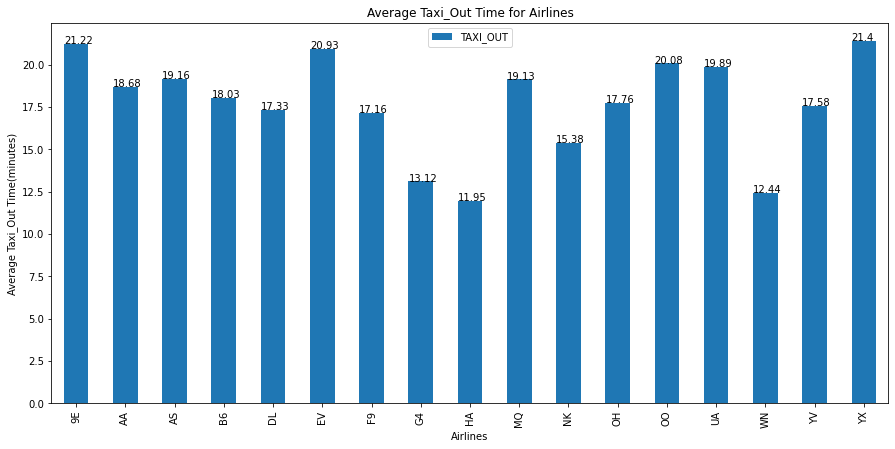

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax= plt.subplots(figsize=(15,7))
carrier = dtf_half2019[['OP_UNIQUE_CARRIER','TAXI_OUT']].groupby(['OP_UNIQUE_CARRIER']).mean().round(2).plot(ax=ax,kind='bar')
plt.xlabel('Airlines')
plt.ylabel('Average Taxi_Out Time(minutes)')
plt.title('Average Taxi_Out Time for Airlines')

for p in carrier.patches:
    t = str(p.get_height())
    t_x = p.get_x()
    t_y = p.get_height()
    carrier.text(t_x,t_y,t)
    
plt.savefig('Airline_Average_Taxi-Out_Time.pdf')

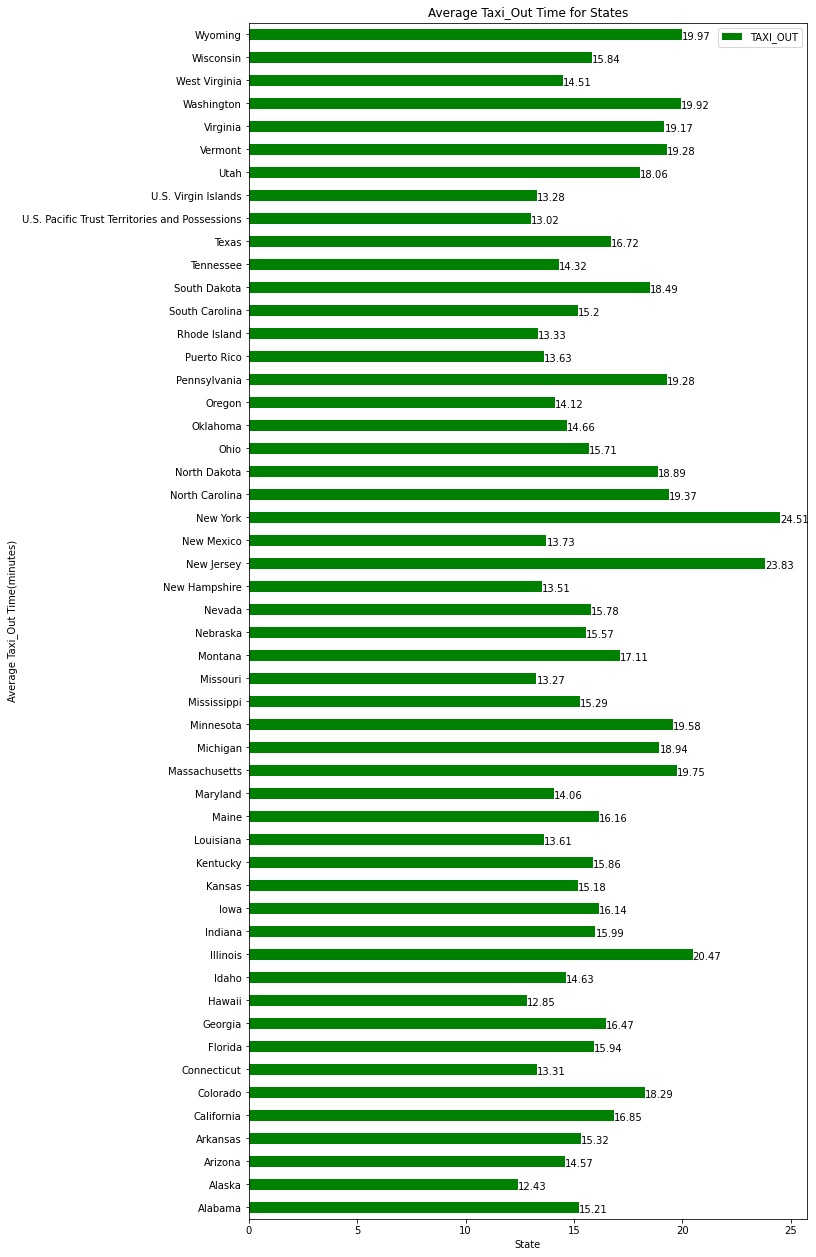

In [26]:
fig,ax= plt.subplots(figsize=(10,22))
state = dtf_half2019[['ORIGIN_STATE_NM','TAXI_OUT']].groupby(['ORIGIN_STATE_NM']).mean().round(2).plot(ax=ax,kind='barh',color='g')
plt.xlabel('State')
plt.ylabel('Average Taxi_Out Time(minutes)')
plt.title('Average Taxi_Out Time for States')

for p in state.patches:
    t = str(p.get_width())
    t_x = p.get_width()
    t_y = p.get_y()
    state.text(t_x,t_y,t)

plt.savefig('State_Average_Taxi-Out_Time.pdf')

YX Airline had the higest average taxi_out time while New York City had the highest average taxi_out tim